In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs 

g:\igri\python368\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Ненормализованные данные
 [[-1.31699455  1.21722815]
 [-0.57717439  1.01937105]
 [-0.27221139  0.96281152]
 [-1.27660156  1.07911196]
 [ 0.43281631  1.19656541]]

Несколько ненормализованных данных
 [[-1.31699455  1.21722815]
 [-0.57717439  1.01937105]
 [-0.27221139  0.96281152]
 [-1.27660156  1.07911196]
 [ 0.43281631  1.19656541]]
Несколько целевых значений
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Размерность ОБУЧАЮЩИХ данных (150, 2)
Несколько первых обуч. элементов
 [[0.41597426 0.54139363]
 [0.69928191 0.63081224]
 [0.23575058 0.97736043]
 [0.84347246 0.60677149]
 [0.88427914 0.06902335]]

Размерность ТЕСТОВЫХ данных (50, 2)
Несколько первых тест. элементов
 [[-0.62957166  0.24506033]
 [-0.96322857  1.03158607]
 [-0.24808649  1.18529074]
 [ 0.11776556 -1.18746705]
 [ 1.39731131 -0.08049317]]


Text(0, 0.5, 'Второй признак')

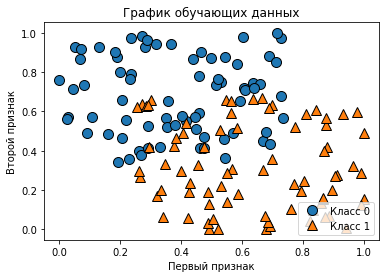

In [2]:
data = np.array(pd.read_csv("MLP_Train.txt", sep='\t', header = None))

X = data[:,:-1]
y = data[:,-1]

# X, y = make_blobs(n_samples=140, centers=2, n_features=2, cluster_std=1.0, random_state=4)
print('Ненормализованные данные\n', X[:5])

print('\nНесколько ненормализованных данных\n', X[:5])
print('Несколько целевых значений\n', y[:10])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

X_scaler = MinMaxScaler().fit(X_train)
X_train  = X_scaler.transform(X_train)

print('\nРазмерность ОБУЧАЮЩИХ данных', X_train.shape)
print('Несколько первых обуч. элементов\n', X_train[:5])
print('\nРазмерность ТЕСТОВЫХ данных', X_test.shape)
print('Несколько первых тест. элементов\n', X_test[:5])

inputs = X_train 
targets = y_train.reshape(-1,1)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) # строим график для набора данных
plt.title("График обучающих данных")
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")

Text(0, 0.5, 'Второй признак')

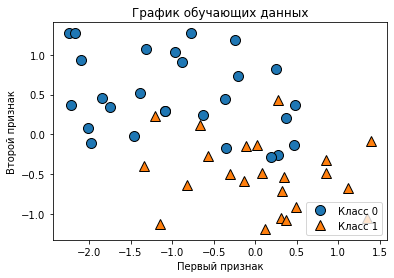

In [3]:
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test) # строим график для набора данных
plt.title("График обучающих данных")
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")

In [4]:
def My_mlp(inputs, targets, nhidden, teta, beta, ErrorStop, Alpha = 0.9): # Alpha - коэф. регуляризации
    # ------------Определение размерности массивов-----------
    error = 100000
    niter = 0
    ErrorList = list()
    IterationList = list()
    ErrorStop = ErrorStop
    
    nin = np.shape(inputs)[1] # Кол-во столбцов ввода
    nout = np.shape(targets)[1] # Кол-во столбцов в выходном массиве
    
    ndata = np.shape(inputs)[0] # Кол-во строк = кол-во примеров
    
    # -------------Инициализация весов-----------------
    weights1 = (np.random.rand(nin + 1, nhidden) - 0.5) * 2/np.sqrt(nin)       # Начальное значение весов должно быть в пределе 
    weights2 = (np.random.rand(nhidden + 1, nout) - 0.5) * 2/np.sqrt(nhidden)  # от -1/sqrt(n) до 1/sqrt(n)

    updatew1 = np.zeros((np.shape(weights1))) # Пустые массивы в которые будут записываться обновлённые массивы
    updatew2 = np.zeros((np.shape(weights2))) 
    
    def mlpfwd(inputs):
        #------------Ф-ия расчёта прямого хода------------
        hidden = np.dot(inputs, weights1); # Выходы скрытых нейронов для всех векторов ввода
        hidden = 1.0/(1.0 + np.exp(-beta*hidden)) # Выходы скрытых нейронов после активации для всех вариантов ввода
        hidden = np.concatenate((-np.ones((np.shape(inputs)[0],1)), hidden), axis = 1) # 
        outputs = np.dot(hidden, weights2) # Ответы выходных нейронов
        y = 1.0/(1.0 + np.exp(-beta*outputs))
        return y, hidden
    
    inputs = np.concatenate((-np.ones((ndata,1)), inputs),axis = 1) # Добавляем столбец из -1-иц в массив вход. данных,
                                                                    # смещение для каждого вход. вектора 
        #------------Функция обратного хода------------
    while ((error > ErrorStop) and (niter < 3000)): # Условия выхода
        niter += 1
        outputs, hidden1 = mlpfwd(inputs) # Результат прямого прохода - выходы MLP и выходы скрыт. нейронов для всего входного н.д.
        error = 0.5 * np.sum((outputs - targets)**2)
        
        if (np.mod(niter, 100) == 0):
            IterationList.append(niter)
            ErrorList.append(error)
            print(error,' на итерации ', niter)
        
        deltao = beta*(outputs-targets)*outputs*(1.0-outputs) # Ошибка выходного слоя
        deltah = hidden1*beta*(1.0-hidden1)*(np.dot(deltao, np.transpose(weights2))) # Ошибка скрытого слоя
        
        updatew1 = teta*(np.dot(np.transpose(inputs),deltah[:,:-1])) + Alpha*updatew1 # Нулевые матрицы размероностей массивов матриц весов
        updatew2 = teta*(np.dot(np.transpose(hidden1),deltao)) + Alpha*updatew2 # Коррекция весов
        
        weights1 -= updatew1
        weights2 -= updatew2
        
        inputs = inputs[:,1:]
        
        ConcatArray = np.concatenate((inputs, targets), axis=1)
        RandomLine = np.take(ConcatArray, np.random.permutation(ConcatArray.shape[0]), axis=0, out=ConcatArray);
        inputs = RandomLine[:, :-1]
        targets = RandomLine[:, -1]
        targets = targets.reshape(np.shape(inputs)[0], 1)
        inputs = np.concatenate((-np.ones((ndata, 1)), inputs), axis=1)
        
    fig, axes = plt.subplots(1, 1, figsize=(10, 3))
    plt.plot(IterationList, ErrorList, label = "Ошибка")
    plt.ylabel("Ошибка")
    plt.xlabel("Кол-во итераций")
    plt.legend()
    
    return weights1, weights2, niter

8.744391406974383  на итерации  100
9.644968277656659  на итерации  200
9.196635245992965  на итерации  300
9.1785666229403  на итерации  400
9.175735440384074  на итерации  500
9.174631645797186  на итерации  600
9.17377209859754  на итерации  700
9.172951243384412  на итерации  800
9.172138284257535  на итерации  900
9.171328470437132  на итерации  1000
9.170521058524528  на итерации  1100
9.169715929015503  на итерации  1200
9.168913059887004  на итерации  1300
9.168112444336384  на итерации  1400
9.167314077924889  на итерации  1500
9.166517956575227  на итерации  1600
9.165724076262713  на итерации  1700
9.164932432968854  на итерации  1800
9.164143022674887  на итерации  1900
9.163355841361119  на итерации  2000
9.162570885006971  на итерации  2100
9.161788149591075  на итерации  2200
9.161007631091366  на итерации  2300
9.160229325485131  на итерации  2400
9.15945322874907  на итерации  2500
9.158679336859347  на итерации  2600
9.157907645791632  на итерации  2700
9.157138151521

g:\igri\python368\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


  на итерации  2900
9.15560573727107  на итерации  3000


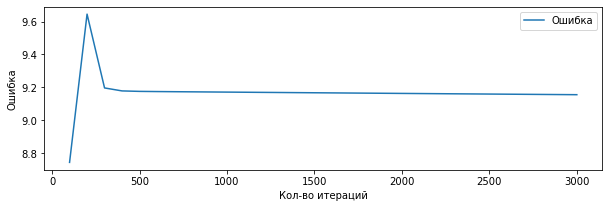

In [5]:
# Объявление параметров писиптрона
nhidden = 5 # Кол-во скрытых нейронов в слое
beta = 0.5 # Коэф. сигмоидальной функции
ErrorStop = 0.1 # Условие остановы (квадратичная ошибка)
teta = 0.25 # Норма обучения

we1, we2, Niter = My_mlp(inputs, targets, nhidden, teta, beta, ErrorStop)
#print('Веса обученного MLP: первый слой \n{}'.format(we1), '\n', '\nВеса обученного MLP второй слой \n{}'.format(we2))
#print('Количество итераций', Niter, 'за которое перцептрон достигает ошибки', ErrorStop)

In [6]:
def useMy_mlp(inputs, we1, we2, beta):
    inputs = np.concatenate((-np.ones((np.shape(inputs)[0], 1)), inputs), axis = 1)
    hid = np.dot(inputs, we1)
    hid = 1.0/(1.0 + np.exp(-beta*hid))
    hid = np.concatenate((-np.ones((np.shape(inputs)[0], 1)), hid), axis = 1)
    out = np.dot(hid, we2)
    out1 = 1.0/(1.0 + np.exp(-beta*out))
    
    return out1

In [7]:
#--------- Тестовые размеченные ----------
otvet = np.round(useMy_mlp(inputs, we1, we2, beta))
print('\nТочность обучения \n', accuracy_score(otvet, targets))

DataTest = X_scaler.transform(X_test)

otvet = np.round(useMy_mlp(DataTest, we1, we2, beta))
print('Точность теста \n', accuracy_score(otvet, y_test))


Точность обучения 
 0.8
Точность теста 
 0.86


g:\igri\python368\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
g:\igri\python368\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [ ]:
from sklearn.neural_network import MLPClassifier 

MLP = MLPClassifier( max_iter = 3000, learning_rate_init = 0.25, activation = 'logistic', 
                    hidden_layer_sizes = 5, alpha = 0.9).fit(X_train, y_train)

print("Правильность обучающей выборки {:.2f}".format(MLP.score(X_train, y_train)))
print("Правильность тест выборки {:.2f}".format(MLP.score(X_test, y_test)))

In [78]:
#--------- Тестовые неразмеченные ----------
DataTest = np.array(pd.read_csv("MPL_Test.txt", sep='\t', header = None)) # Считывание данных

otvet = np.round(useMy_mlp(DataTest, we1, we2, beta))

for Srav in range(0, DataTest.shape[0]):
    print(DataTest[Srav],' ',otvet[Srav])
    
mglearn.discrete_scatter(DataTest[:, 0], DataTest[:, 1], otvet[:, -1]) # строим график для набора данных
plt.legend(["Класс 0", "Класс 1"], loc=1)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")

FileNotFoundError: [Errno 2] No such file or directory: 'MPL_Test.txt'

In [80]:
otvet = MLP.predict(DataTest)
for Srav in range(0, DataTest.shape[0]):
    print(DataTest[Srav],' ',otvet[Srav])

mglearn.discrete_scatter(DataTest[:, 0], DataTest[:, 1], otvet[:]) # строим график для набора данных
plt.legend(["Класс 0", "Класс 1"], loc=1)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")

Правильность обучающей выборки 0.84
Правильность тест выборки 0.80
